In [ ]:
import torch
from torch import nn
import numpy as np
from matplotlib import pyplot as plt

torch.__version__

'2.0.1+cu118'

In [ ]:
# Allow access to google drive for working with images
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import sys
sys.path.append("/content/drive/MyDrive/Colab_Notebooks/")

In [ ]:
# Setup device-agnoistc code
device = "cuda" if torch.cuda.is_available else "cpu"
device

'cuda'

In [ ]:
# Setting Random Seed for Reproducibility
RANDOM_SEED = 0

# Set seed for torch
torch.manual_seed(RANDOM_SEED)
torch.cuda.manual_seed(RANDOM_SEED)

In [ ]:
# Parameter for Augmentation
AUGMENTATION = True

# File Paths

In [ ]:
from pathlib import Path

# Setup path to data folder
data_path = Path("/content/drive/MyDrive/Colab_Notebooks/")
image_path = data_path / "melanoma_cancer_dataset"

# Setup Train and Testing Paths
train_dir = image_path / "train"
test_dir = image_path / "test"

# Visualize the train and test paths
train_dir, test_dir

(PosixPath('/content/drive/MyDrive/Colab_Notebooks/melanoma_cancer_dataset/train'),
 PosixPath('/content/drive/MyDrive/Colab_Notebooks/melanoma_cancer_dataset/test'))

# 2) Image Transformations

In [ ]:
from torchvision import datasets, transforms

# # TRAIN DATA TRANSFORMATIONS
# train_transform = transforms.Compose([
#     # 5% probability of random flip
#     transforms.RandomHorizontalFlip(p=0.05),
#     # 5% probability of random rotation
#     transforms.RandomApply([transforms.RandomRotation(degrees=(-10, 10))], p=0.05),
#     # 5% probability of a random colorjittter
#     transforms.RandomApply([transforms.ColorJitter(brightness=0.2,
#                                                    contrast=0.2,
#                                                    saturation=0.2,
#                                                    hue=0.2)], p=0.05),
#     transforms.Resize(256),
#     transforms.CenterCrop(224),
#     transforms.ToTensor(),
#     transforms.Normalize(mean=[0.485, 0.456, 0.406],
#                          std=[0.229, 0.224, 0.225])
#     ])

# Define Transformations for Test Data
# (No Data Augmentation)
test_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])



# 3) Defining Training, Validation, and, Testing Data

## A) Read and Transform the data

In [ ]:
from torch.utils.data import random_split

# Percentage Validation Data to Use for Training
VAL_PERC = 0.1

# Load the testing data
test_data = datasets.ImageFolder(root=test_dir,
                                 transform=test_transform,
                                 target_transform=None)


In [ ]:
# Check the length of the training and testing dataset
print(f"Length of Test: {len(test_data)}")
print()
print(f"Dimensions of Tensorflow Image: {test_data[0][0].shape}")

Length of Test: 2000

Dimensions of Tensorflow Image: torch.Size([3, 224, 224])


# 4) Load data into data loader

In [ ]:
import os
# Define Batch Size and Num_workers
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

In [ ]:
# Turn the train and test datasets into dataloaders
from torch.utils.data import DataLoader

print(f"Creating DataLoaders with batch size {BATCH_SIZE} and {NUM_WORKERS} workers.")

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=50,
                             num_workers=NUM_WORKERS
                             )

test_dataloader

Creating DataLoaders with batch size 32 and 12 workers.


# 5) Building Models

In [ ]:
from torchvision import models

# Import pretrained vg11 network
model_0 = models.vgg11(pretrained=False)

# Modify last layer so it is good for binary classification
model_0.classifier[6] = nn.Linear(4096, 1)

# Move model to cuda device
model_0.to(device)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): ReLU(inplace=True)
    (13): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (14): ReLU(inplace=True)
    (15): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
 

# 6) Save Trained Model Parameters

In [ ]:
# Model Name
MODEL_NAME = f"VGG11_10_iter_Aug_True"

# The directory to store the model
models_dir = "/content/drive/MyDrive/Colab_Notebooks/models/"
file_path = models_dir + MODEL_NAME + ".pth"

## Load the Model Parameters

In [ ]:
# Create an instance of the model
model_0 = models.vgg11(pretrained=False)

# Modify last layer so it is good for binary classification
model_0.classifier[6] = nn.Linear(4096, 1)

# Send model to the correct device
model_0.to(device)

# Load the saved model state
model_0.load_state_dict(torch.load(file_path))

<All keys matched successfully>

In [ ]:
model_0

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): ReLU(inplace=True)
    (13): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (14): ReLU(inplace=True)
    (15): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
 

# 7) Test Against Train Data

In [ ]:
from training_script import test as Test

# Define the loss function
# Binary Cross Entropy Loss
loss_fn = nn.BCEWithLogitsLoss()

# Check the performance of the model
loss, acc, TP, TN, FN, FP, y_probs, y_test = Test(model_0,
                                                test_dataloader,
                                                loss_fn,
                                                device)

print(f"Model had a Loss of: {loss}")
print(f"Model had an accuracy of: {acc}")
print(f"True Positive (TP): {TP}")
print(f"True Negative (TN): {TN}")
print(f"False Negative (FN): {FN}")
print(f"False Positive (FP): {FP}")

Model had a Loss of: 0.23964505202602596
Model had an accuracy of: 0.9055000000000003
True Positive (TP): 891
True Negative (TN): 920
False Negative (FN): 109
False Positive (FP): 80


In [ ]:
import pickle
# Save the predictions and labels using pickle
PRED_DIR = "/content/drive/MyDrive/Colab_Notebooks/predictions/"

with open(PRED_DIR + MODEL_NAME + "_PRED", "wb") as fp:
  pickle.dump(y_probs, fp)

with open(PRED_DIR + MODEL_NAME + "_TRUE", "wb") as fp:
  pickle.dump(y_test, fp)

In [ ]:
# precision = TP / (TP + FP)
# recall = TP / (TP + FN)
# F1 = (2*precision*recall) / (precision + recall)
# accuracy = (TP + TN) / (TP + FN + TN + FP)
# specificity = TN / (TN + FP)

# print(f"Precision: {precision}")
# print(f"Recall: {recall}")
# print(f"F1 Score: {F1}")
# print(f"Accuracy: {accuracy}")
# print(f"Specificity: {specificity}")

# 9) Grad-Cam Visualization

In [ ]:
index = 1051

## Import Grad-CAM Package

In [ ]:
try:
  from pytorch_grad_cam import GradCAM, HiResCAM, ScoreCAM, GradCAMPlusPlus, AblationCAM, XGradCAM, EigenCAM, FullGrad
  from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
  from pytorch_grad_cam.utils.image import show_cam_on_image
except:
  !pip install grad-cam
  from pytorch_grad_cam import GradCAM, HiResCAM, ScoreCAM, GradCAMPlusPlus, AblationCAM, XGradCAM, EigenCAM, FullGrad
  from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
  from pytorch_grad_cam.utils.image import show_cam_on_image

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 64.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for grad-cam: filename=grad_cam-1.4.8-py3-none-any.whl size=38247 sha256=f327bd7d52502cd70522cf59d8f6f77c91dab4c81bb21674000367c7f6c3d44a
  Stored in directory: /root/.cache/pip/wheels/f8/04/36/94ff3c8a4215826a21946b34c01180817e606989fdf53f7cd6
Successfully built grad-cam


## A) Prepare Visualization

In [ ]:
# Select a particular image to look at
img = test_data[index][0]
label = test_data[index][1]


# Select the model and which layer to look at
model = model_0
target_layer = [model_0.features[20]]
input_tensor = img.unsqueeze(0)

# Construct the CAM object then use on many images
cam = GradCAM(model=model, target_layers=target_layer, use_cuda=True)
targets = None
grayscale_cam = cam(input_tensor=input_tensor,
                   targets=targets,
                   aug_smooth=True
                   )

# # Grayscale overlay
grayscale_cam = grayscale_cam[0, :]

# Preparing Original Input Image
rgb_img = img.squeeze(dim=0)

# Do so by dividing by making
# min 0 and max 1 for each channel
chanel1 = rgb_img[0,:,:]
chanel2 = rgb_img[1,:,:]
chanel3 = rgb_img[2,:,:]

rgb_img[0,:,:] = (chanel1 - torch.min(chanel1)) / (torch.max(chanel1) - torch.min(chanel1))
rgb_img[1,:,:] = (chanel2 - torch.min(chanel2)) / (torch.max(chanel2) - torch.min(chanel2))
rgb_img[2,:,:] = (chanel3 - torch.min(chanel3)) / (torch.max(chanel3) - torch.min(chanel3))

# Change Channel Arrangment and make numpy for imshow
rgb_img = img.squeeze(dim=0).permute(1,2,0).numpy().astype(np.float32)

# Generate the Visualization
visualization = show_cam_on_image(rgb_img, grayscale_cam, use_rgb=True)

## B) Determine Prediction of the image

In [ ]:
# Get the class index dictionary
class_idx = test_data.class_to_idx
idx_class = {v: k for k, v in class_idx.items()}

# Perform a forward pass on a single image
model_0.eval()
with torch.inference_mode():
  pred = model_0(input_tensor.to(device))

pred_label = int(torch.round(torch.sigmoid(pred)).item())
# Print out what's happening and convert model logits -> pred probs -> pred label
print(f"Ouput logits: \n{pred}\n")
print(f"Output prediction probabilities: \n{torch.sigmoid(pred)}\n")
print(f"Ouput prediction label: \n{torch.round(torch.sigmoid(pred))}\n")
print(f"Actual label: \n{label}")

Ouput logits: 
tensor([[3.0452]], device='cuda:0')

Output prediction probabilities: 
tensor([[0.9546]], device='cuda:0')

Ouput prediction label: 
tensor([[1.]], device='cuda:0')

Actual label: 
1


## C) Visualize the final image

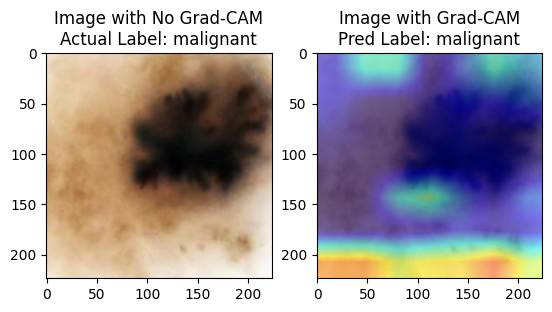

In [ ]:
import time

fig, axs = plt.subplots(1, 2)

# Image 1 (No Grad-CAM)
true_label = idx_class[label]
axs[0].imshow(rgb_img)
axs[0].set_title("Image with No Grad-CAM\n" +
                 f"Actual Label: {true_label}")

# Image 2 (Grad-CAM)
pred_label = idx_class[pred_label]
axs[1].imshow(visualization)
axs[1].set_title("Image with Grad-CAM\n" +
                 f"Pred Label: {pred_label}")
plt.show()

time.sleep(1)  # Add a 1-second delay to ensure the plot is fully rendered

PHOTOS_DIR = "/content/drive/MyDrive/Colab_Notebooks/photos"
fig.savefig(PHOTOS_DIR + "/" + MODEL_NAME + "_PHOTO_" + str(index) + ".png")